In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic = pd.read_csv('/content/train.csv')  # Assuming the file is named titanic.csv

# Display basic information
print(titanic.info())
print(titanic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

# 1. Initial Data Exploration

In [4]:
# Display summary statistics for numerical columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check data types and missing values
titanic.info()
titanic.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
# Impute age with median per passenger class
titanic['Age'] = titanic.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.median())
)

# Verify
print(titanic['Age'].isnull().sum())  # Should be 0

0


In [15]:
# Create a binary flag for cabin presence
titanic['Has_Cabin'] = titanic['Cabin'].notnull().astype(int)

# Drop original column (too many missing values)
titanic.drop('Cabin', axis=1, inplace=True)

In [16]:
# Fill missing Embarked with mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Verify
print(titanic['Embarked'].isnull().sum())  # Should be 0

0


<ipython-input-16-8cfcc85be3bf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


In [18]:
# Check remaining missing values
print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


In [19]:
# Extract titles from 'Name' (e.g., Mr, Mrs, Master)
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create family size
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch']

In [21]:
# Value counts for categorical columns
print(titanic['Pclass'].value_counts())
print(titanic['Sex'].value_counts())
print(titanic['Embarked'].value_counts())
print(titanic['Survived'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64


# 2. Data Visualization

a. Pairplot for Numerical Variables

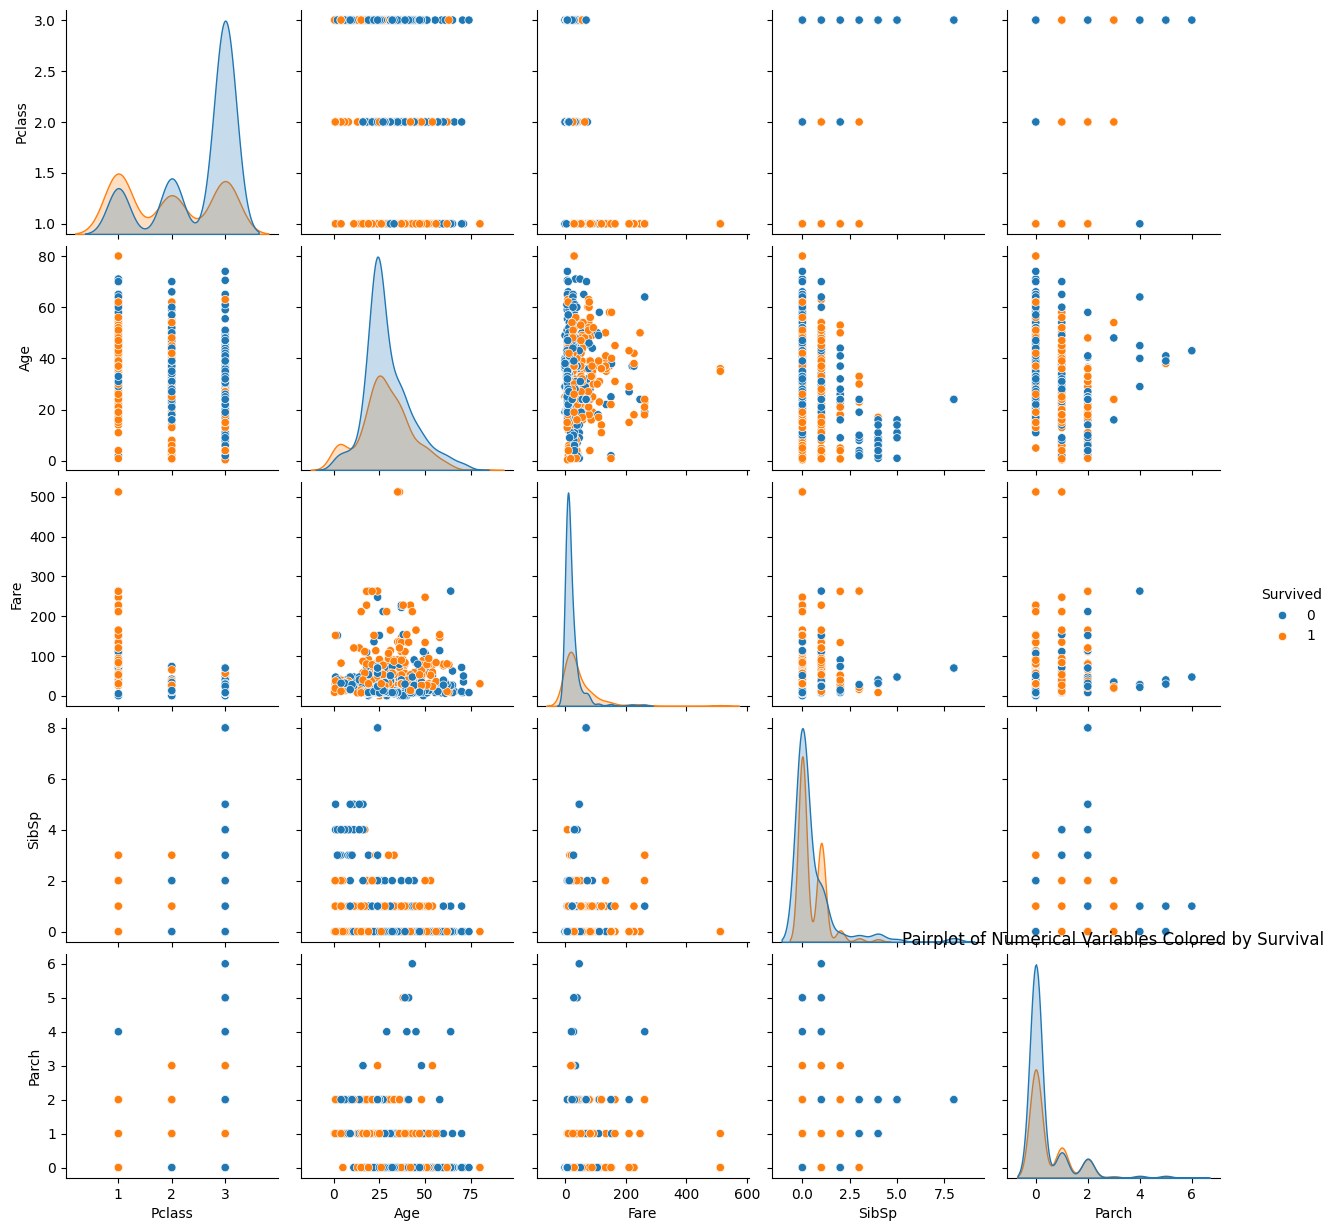

In [22]:
sns.pairplot(titanic[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.title('Pairplot of Numerical Variables Colored by Survival')
plt.show()

b. Correlation Heatmap

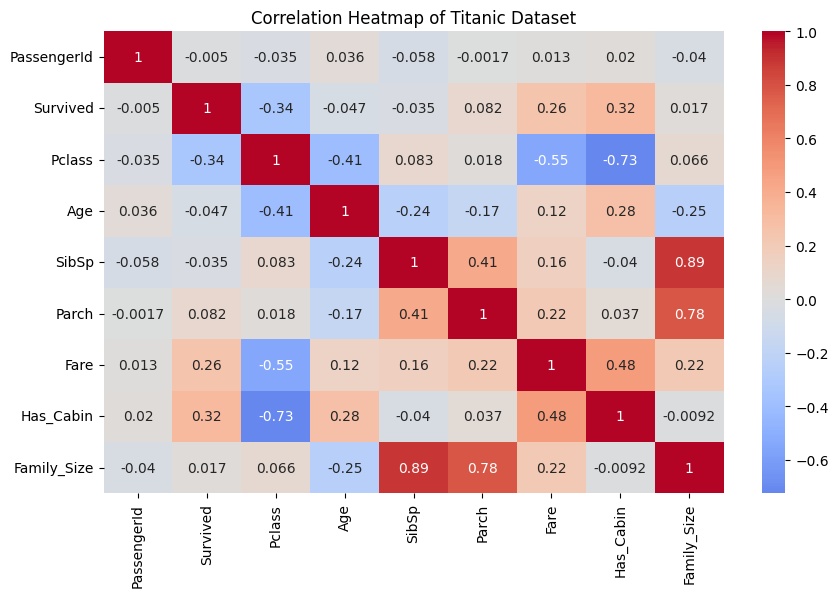

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

c. Survival by Passenger Class

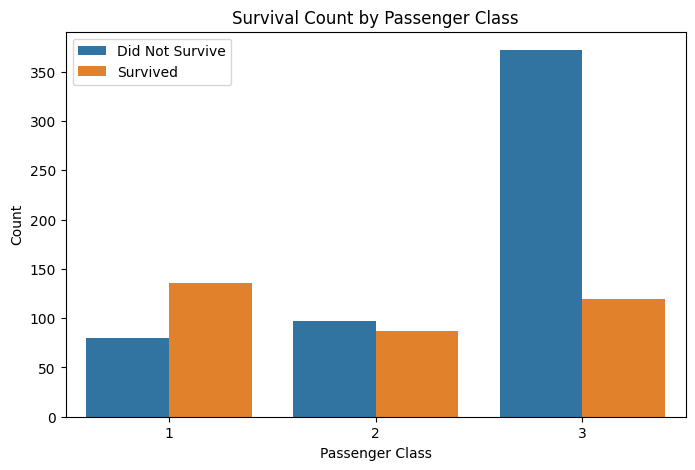

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

d. Age Distribution by Survival

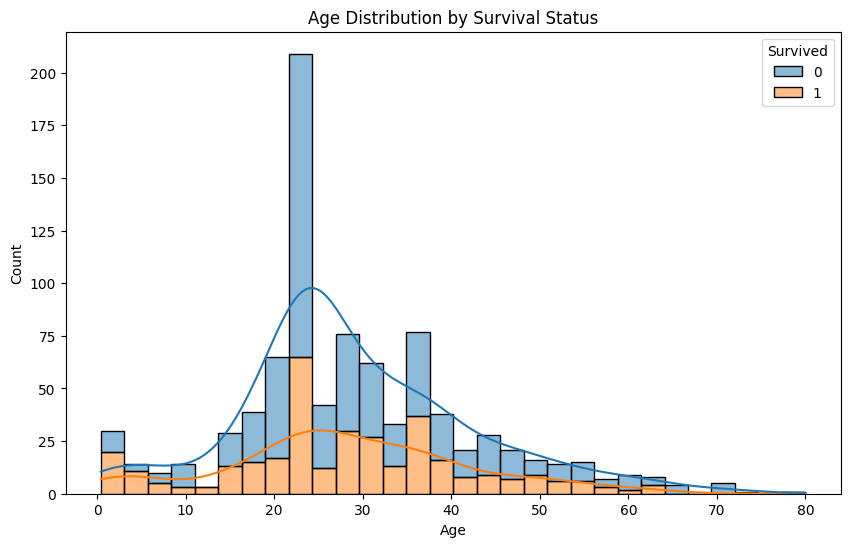

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

e. Survival by Sex

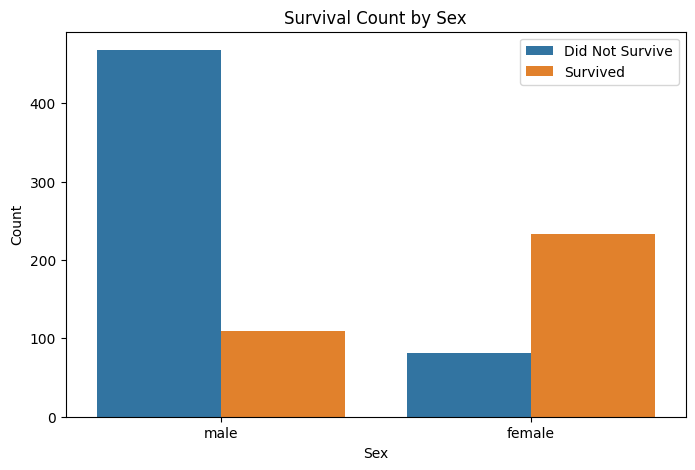

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

f. Fare Distribution by Survival

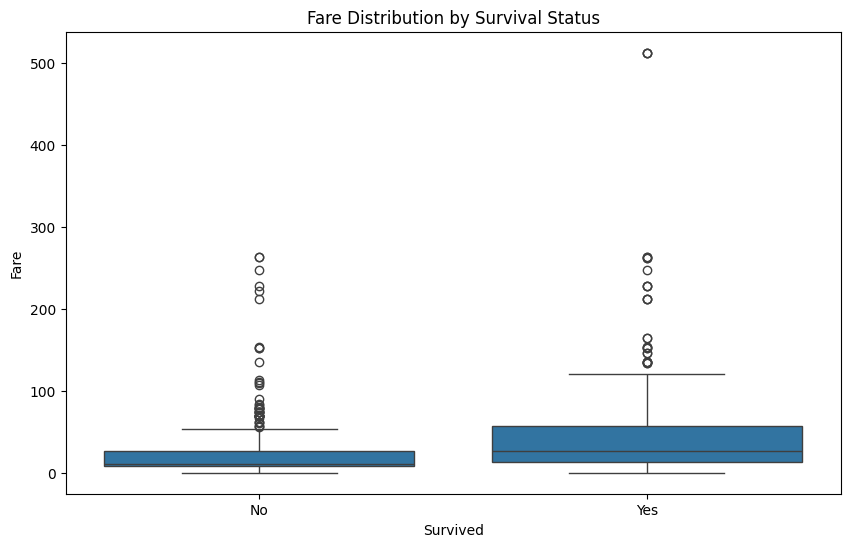

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()